In [1]:
import igraph as ig
import pandas as pd

# Zachary
Let's work with a famous dataset: Zachary.

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club

In [2]:
g = ig.Graph.Famous('Zachary')

We can plot it because it is not that big :)

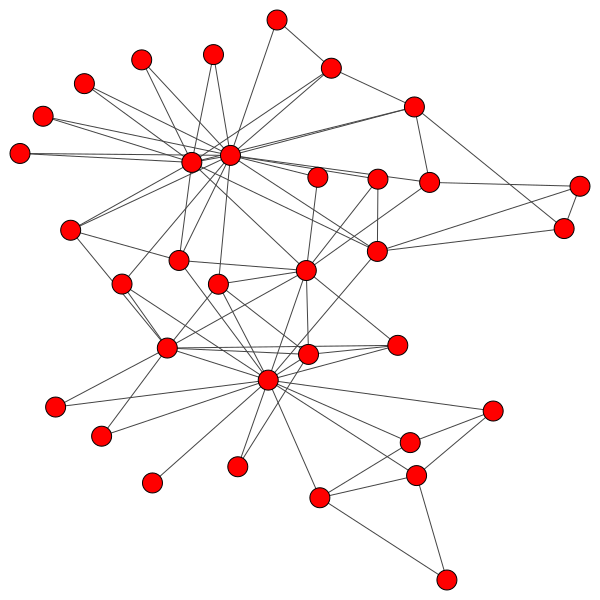

In [3]:
ig.plot(g)

# Detection algorithms

Let's start using community detection algorithms to discover the split in the Karate club.

Here https://igraph.org/python/api/develop/igraph.community.html you can find the doc for Community detection algorithms.

For example let's use louvain algorithm (https://igraph.org/python/api/develop/igraph.community.html#_community_fastgreedy)

In [4]:
louvain = g.community_fastgreedy()

In [5]:
print(louvain)

Dendrogram, 34 elements, 33 merges

18 22 15 8 30 32 24 25 31 28 26 29 33 23 27 14 20 7 3 12 9 2 13 1 17 21 19 16 5 6 0 4 10 11
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  |  | | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  `--' | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   |   | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   `---' | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     |   | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     `---' | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       |   | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       `---' |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |         |   |  |
|  |  |  | |  |  |  |  |  |  `--'  |  |  |  |  |  | |

Remember Louvain algorithm is iterative. That is why we get a dendogram as a result. We can run .as_clustering() to get the different clusterings

In [6]:
print(louvain.as_clustering(2))

Clustering with 34 elements and 2 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21
[1] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [7]:
for i in range(1, 10):
    print(louvain.as_clustering(i))
    print(g.modularity(louvain.as_clustering(i)))

Clustering with 34 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
0.0
Clustering with 34 elements and 2 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21
[1] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
0.3717948717948718
Clustering with 34 elements and 3 clusters
[0] 0, 4, 5, 6, 10, 11, 16, 19
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
0.38067061143984227
Clustering with 34 elements and 4 clusters
[0] 0, 4, 5, 6, 10, 11, 16
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
[3] 19
0.3759861932938856
Clustering with 34 elements and 5 clusters
[0] 0, 4, 5, 6, 10, 11, 16
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
[3] 19
[4] 20
0.3628369493754109
Clustering with 34 elemen

We can plot the graph with different colors per group.

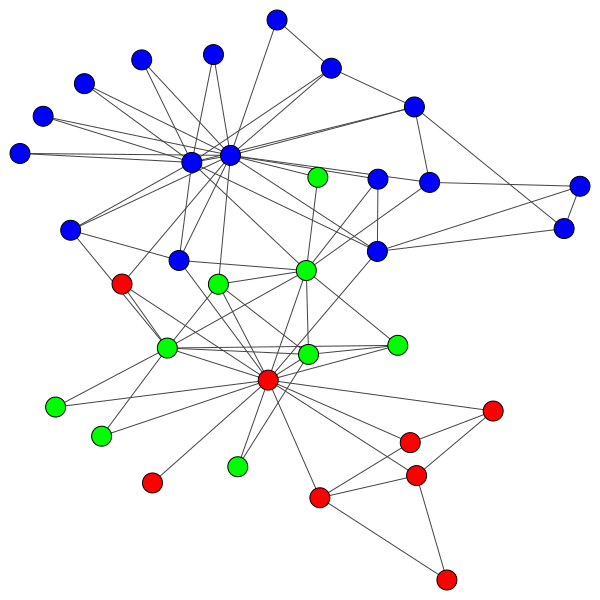

In [8]:
pal = ig.drawing.colors.ClusterColoringPalette(len(louvain.as_clustering(3)))
g.vs['color'] = pal.get_many(louvain.as_clustering(3).membership)
ig.plot(g)

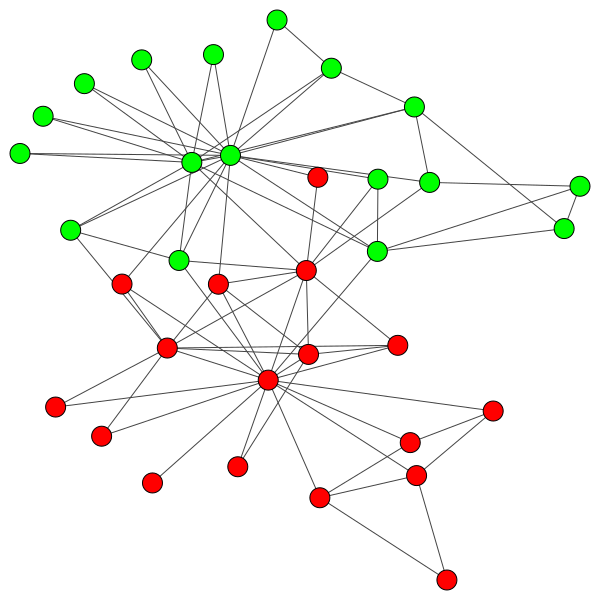

In [21]:
pal = ig.drawing.colors.ClusterColoringPalette(len(louvain.as_clustering(2)))
g.vs['color'] = pal.get_many(louvain.as_clustering(2).membership)
ig.plot(g)

## Exercise: Try using different algorithms and meassure their modularity
(Tip: Not all algorithms (for example community_infomap) return a dendogram, they return a partition. You should check that)

In [9]:
walktrap= g.community_walktrap()

In [22]:
print (walktrap)


Dendrogram, 34 elements, 33 merges

19 0 7 3 1 21 17 12 11 10 4 6 5 16 13 2 9 30 8 31 28 33 32 18 14 15 20 22 29 26 27 23 25 24
|  | | | | |  |  |  |  |  | | | |  |  | | |  | |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
|  | `-' | |  |  |  |  `--' `-' |  |  | | `--' |  |  `--'  |  |  |  |  |  `--'  |  |  `--'
|  |  |  | |  |  |  |   |    |  |  |  | |  |   |  |   |    |  |  |  |  |   |    |  |   |  
|  |  `--' |  |  |  |   |    |  |  `--' |  |   |  |   `----'  |  |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |     |     |  |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |     `-----'  |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |        |     |  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |        `-----'  |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |           |     |  |   |    |  |   |  
|  |   |   |  |  |  |   |    |  |   |   |  |   |  |  

In [11]:
print (walktrap.as_clustering(2))

Clustering with 34 elements and 2 clusters
[0] 0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 16, 17, 19, 21
[1] 2, 8, 9, 13, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
    33


In [12]:
for i in range (1,20):
    print (walktrap.as_clustering(i))
    print (g.modularity(walktrap.as_clustering(i)))

Clustering with 34 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
0.0
Clustering with 34 elements and 2 clusters
[0] 0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 16, 17, 19, 21
[1] 2, 8, 9, 13, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
    33
0.3352235371466141
Clustering with 34 elements and 3 clusters
[0] 0, 1, 3, 7, 11, 12, 17, 19, 21
[1] 2, 8, 9, 13, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
    33
[2] 4, 5, 6, 10, 16
0.3431130834976989
Clustering with 34 elements and 4 clusters
[0] 0, 1, 3, 7, 11, 12, 17, 19, 21
[1] 2, 8, 9, 13, 14, 15, 18, 20, 22, 26, 28, 29, 30, 31, 32, 33
[2] 4, 5, 6, 10, 16
[3] 23, 24, 25, 27
0.3519888231426694
Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 17, 19, 21
[1] 2, 8, 9, 13, 28, 30, 31
[2] 4, 5, 6, 10, 16
[3] 14, 15, 18, 20, 22, 26, 29, 32, 33
[4] 23, 24, 25, 27
0.3532215647600263
Clustering with 34

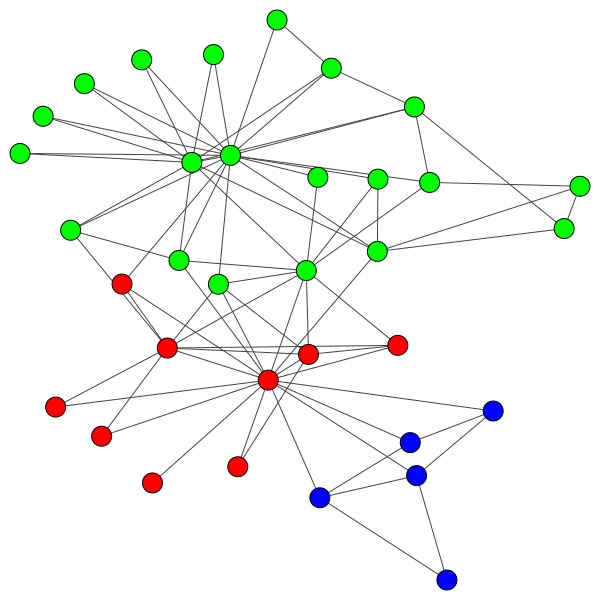

In [16]:
#plotting the graph with walktrap clustering
pal2 = ig.drawing.colors.ClusterColoringPalette(len(walktrap.as_clustering(3)))
g.vs['color'] = pal2.get_many(walktrap.as_clustering(3).membership)
ig.plot(g)


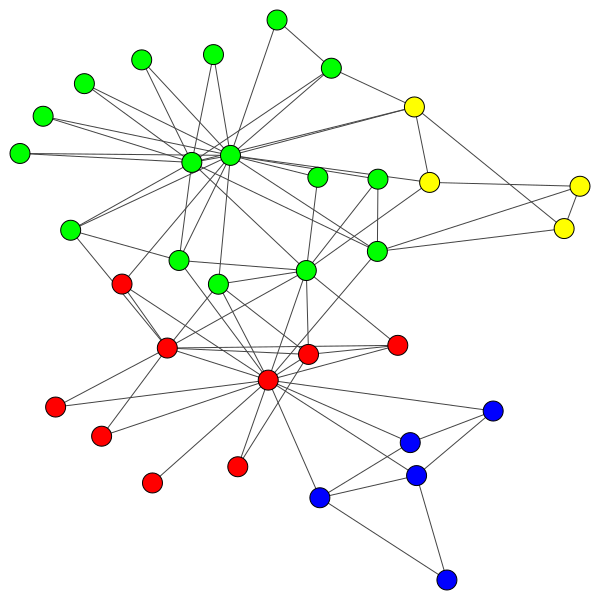

In [17]:
#plotting the graph with walktrap clustering for k=4
pal3 = ig.drawing.colors.ClusterColoringPalette(len(walktrap.as_clustering(4)))
g.vs['color'] = pal3.get_many(walktrap.as_clustering(4).membership) 
ig.plot(g)


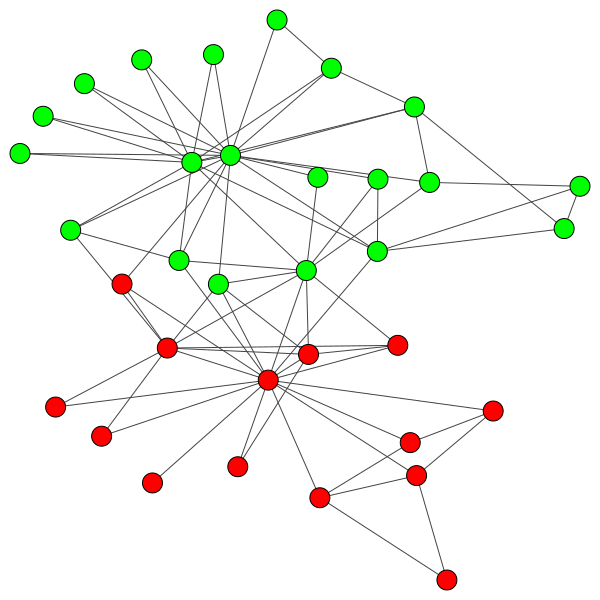

In [19]:
#plotting the graph with walktrap clustering with k=2
pal4 = ig.drawing.colors.ClusterColoringPalette(len(walktrap.as_clustering(2)))
g.vs['color'] = pal4.get_many(walktrap.as_clustering(2).membership) 
ig.plot(g)